<a href="https://colab.research.google.com/github/karan-mudaliar/USML-Project/blob/main/USML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Applications of Unsupervised Deep Learning
* For the first part of the project, I want to use Unsupervised learning and Deep Unsupervised Learning Techniques as a pretraining step to train classification systems
* For the second part of the project, I want to demonstrate if Deep Unsupervised
pre-training combined with various clustering techniques can perform comparably to supervised training methods.

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization,  Dense, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import GlorotNormal, HeNormal
from tensorflow.keras.models import Sequential
import random
import matplotlib.pyplot as plt
# import pandas as pd

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Input, Reshape, LeakyReLU, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Nadam
import numpy as np
from IPython import display  # If using IPython, Colab, or Jupyter
from matplotlib import pyplot as plt

In [ ]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()

# Normalize MNIST data
x_train_mnist = x_train_mnist / 255.0
x_test_mnist = x_test_mnist / 255.0

print("MNIST Train Data Shape:", x_train_mnist.shape)
print("MNIST Test Data Shape:", x_test_mnist.shape)


11490434/11490434 [==============================] - 0s 0us/step
MNIST Train Data Shape: (60000, 28, 28)
MNIST Test Data Shape: (10000, 28, 28)


In [ ]:
kmnist_train_dataset, kmnist_test_dataset = tfds.load(
    name="kmnist",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True
)

# Normalize KMNIST data
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

kmnist_train_dataset = kmnist_train_dataset.map(normalize_image)
kmnist_test_dataset = kmnist_test_dataset.map(normalize_image)

# Convert KMNIST datasets to NumPy arrays
x_train_kmnist, y_train_kmnist = [], []
x_test_kmnist, y_test_kmnist = [], []

for image, label in kmnist_train_dataset:
    x_train_kmnist.append(image.numpy())
    y_train_kmnist.append(label.numpy())

for image, label in kmnist_test_dataset:
    x_test_kmnist.append(image.numpy())
    y_test_kmnist.append(label.numpy())

# Convert to NumPy arrays
x_train_kmnist = np.array(x_train_kmnist)
y_train_kmnist = np.array(y_train_kmnist)
x_test_kmnist = np.array(x_test_kmnist)
y_test_kmnist = np.array(y_test_kmnist)

print("KMNIST Train Data Shape:", x_train_kmnist.shape)
print("KMNIST Test Data Shape:", x_test_kmnist.shape)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/3.0.1.incomplete8QV839/kmnist-train.tfrecord*...:   0%|          | …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/3.0.1.incomplete8QV839/kmnist-test.tfrecord*...:   0%|          | 0…

Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.
KMNIST Train Data Shape: (48000, 28, 28, 1)
KMNIST Test Data Shape: (12000, 28, 28, 1)


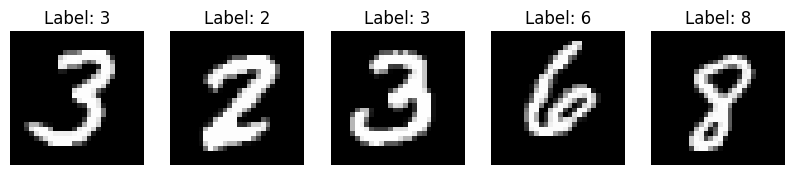

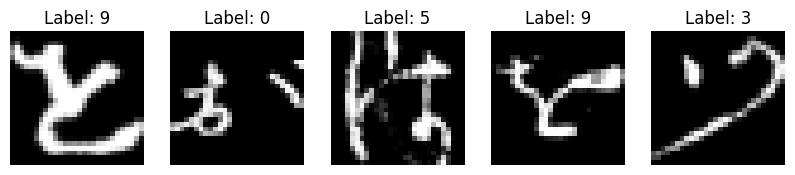

In [ ]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
# Helper function to display random images
def show_random_images(dataset, num_images=5):
    plt.figure(figsize=(10, 5))
    for i, (image, label) in enumerate(dataset.shuffle(1000).take(num_images)):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image.numpy(), cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()

# Display 5 random images from MNIST
show_random_images(tf.data.Dataset.from_tensor_slices((x_train_mnist, y_train_mnist)), num_images=5)

# Display 5 random images from KMNIST
show_random_images(tf.data.Dataset.from_tensor_slices((x_train_kmnist, y_train_kmnist)), num_images=5)

In [ ]:
simpleCNN = Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    BatchNormalization(),

    layers.Dense(10, activation='softmax')
])

In [ ]:
simpleCNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = simpleCNN.fit(x_train_mnist, y_train_mnist, epochs=5, validation_data=(x_test_mnist, y_test_mnist))

Epoch 1/5
1875/1875 [==============================] - 22s 5ms/step - loss: 0.0981 - accuracy: 0.9716 - val_loss: 0.0569 - val_accuracy: 0.9816
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0389 - val_accuracy: 0.9882
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0302 - accuracy: 0.9911 - val_loss: 0.0311 - val_accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.0352 - val_accuracy: 0.9895
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0205 - accuracy: 0.9932 - val_loss: 0.0308 - val_accuracy: 0.9887


In [ ]:
def rounded_accuracy(y_true,y_pred ):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
encoder = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128,activation = 'relu'),
    Dense(64,activation = 'relu'),

])

decoder = Sequential([
    Dense(128,activation = 'relu'),
    Dense(28*28,activation = 'sigmoid'),
    Reshape((28,28))
])

In [ ]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
autoencoder = Sequential([encoder, decoder])

In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=[rounded_accuracy])

In [ ]:
history = autoencoder.fit(x_train_kmnist, x_train_kmnist, epochs=10, validation_data=(x_test_kmnist, x_test_kmnist))

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1921 - rounded_accuracy: 0.9285 - val_loss: 0.1852 - val_rounded_accuracy: 0.9323
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1822 - rounded_accuracy: 0.9346 - val_loss: 0.1781 - val_rounded_accuracy: 0.9368
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1768 - rounded_accuracy: 0.9380 - val_loss: 0.1739 - val_rounded_accuracy: 0.9398
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1728 - rounded_accuracy: 0.9404 - val_loss: 0.1696 - val_rounded_accuracy: 0.9424
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1698 - rounded_accuracy: 0.9423 - val_loss: 0.1684 - val_rounded_accuracy: 0.9428
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1675 - rounded_accuracy: 0.9437 - val_loss: 0.1657 - val_rounded_accuracy: 0.9446
Epoch 7/10
1500/1500 [==================

1/1 [==============================] - 0s 74ms/step


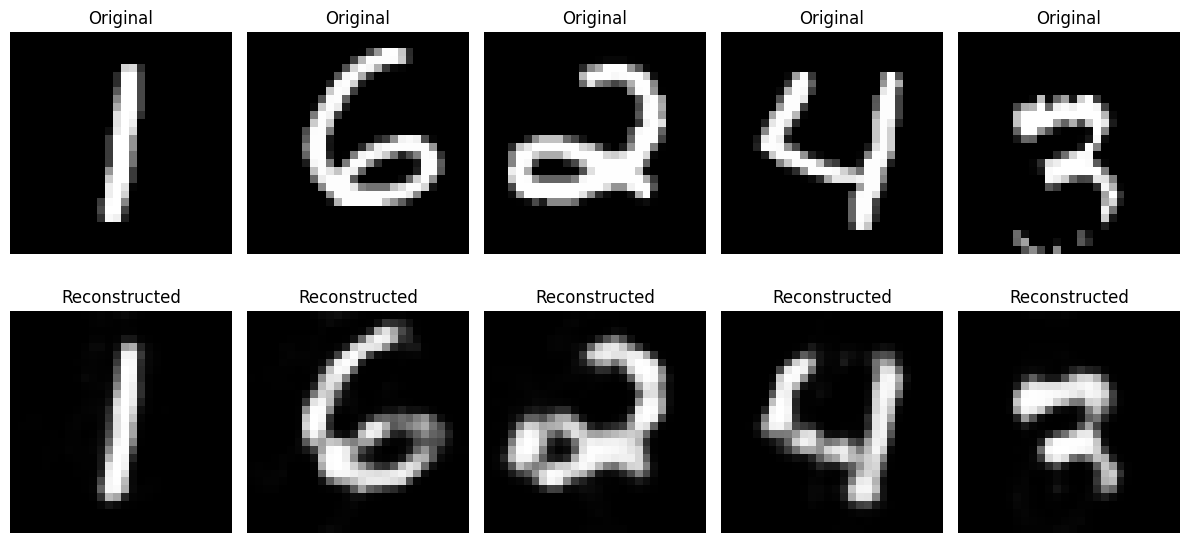

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

num_images_to_display = 5
random_indices = np.random.randint(0, len(x_test_mnist), num_images_to_display)
selected_images = x_test_mnist[random_indices]
random_indices_kmnist = np.random.randint(0, len(x_test_kmnist), num_images_to_display)
selected_images_kmnist = x_test_kmnist[random_indices]


reconstructed_images_kmnist = autoencoder.predict(selected_images_kmnist)
reconstructed_images = autoencoder.predict(selected_images)

# Display the original and reconstructed images
plt.figure(figsize=(12, 6))
for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, num_images_to_display, i + 1 + num_images_to_display)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

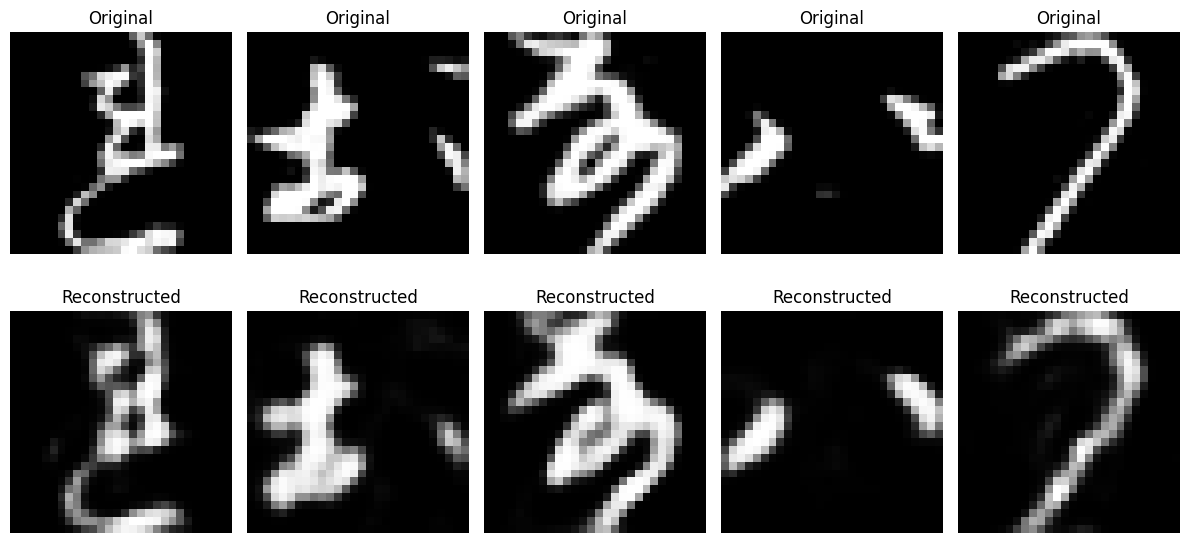

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(selected_images_kmnist[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, num_images_to_display, i + 1 + num_images_to_display)
    plt.imshow(reconstructed_images_kmnist[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
autoencoder_classifier = Sequential([
    encoder,
    layers.Dense(10, activation='softmax')  # 10 classes for MNIST
])

In [ ]:
autoencoder_classifier.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)


num_samples_to_use = 15000

x_train_mnist_subset = x_train_mnist[:num_samples_to_use]
y_train__mnist_subset = y_train_mnist[:num_samples_to_use]

In [ ]:
history_autoencoder_classifier = autoencoder_classifier.fit(x_train_mnist_subset, y_train__mnist_subset, epochs = 5, validation_data=(x_test_mnist, y_test_mnist))

Epoch 1/5
469/469 [==============================] - 6s 9ms/step - loss: 0.3968 - accuracy: 0.8880 - val_loss: 0.1847 - val_accuracy: 0.9425
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1015 - accuracy: 0.9700 - val_loss: 0.1554 - val_accuracy: 0.9535
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0666 - accuracy: 0.9817 - val_loss: 0.1367 - val_accuracy: 0.9583
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0454 - accuracy: 0.9876 - val_loss: 0.1355 - val_accuracy: 0.9617
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0323 - accuracy: 0.9907 - val_loss: 0.1474 - val_accuracy: 0.9599


#Convolutional Autoencoder


In [ ]:
con_encoder = Sequential([
    layers.Input(shape=(28, 28, 1)),  # Input shape for MNIST images
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D()
])

# Decoder
con_decoder = Sequential([
    layers.Conv2DTranspose(32, 3, strides=2, padding='valid', activation='relu'),
    layers.Conv2DTranspose(16, 3, strides=2, padding='same', activation='relu'),
    layers.Conv2DTranspose(1, 3, strides=2, padding='same', activation='sigmoid'),
    layers.Reshape((28, 28))
])


In [ ]:
conv_autoencoder = Sequential([con_encoder, con_decoder])

In [ ]:
conv_autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=[rounded_accuracy])

In [ ]:
history = conv_autoencoder.fit(x_train_kmnist, x_train_kmnist, epochs=10, validation_data=(x_test_kmnist, x_test_kmnist))

Epoch 1/10
1500/1500 [==============================] - 14s 8ms/step - loss: 0.2258 - rounded_accuracy: 0.9074 - val_loss: 0.1783 - val_rounded_accuracy: 0.9352
Epoch 2/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.1696 - rounded_accuracy: 0.9409 - val_loss: 0.1634 - val_rounded_accuracy: 0.9455
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1589 - rounded_accuracy: 0.9481 - val_loss: 0.1554 - val_rounded_accuracy: 0.9507
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1532 - rounded_accuracy: 0.9521 - val_loss: 0.1518 - val_rounded_accuracy: 0.9533
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1495 - rounded_accuracy: 0.9547 - val_loss: 0.1485 - val_rounded_accuracy: 0.9554
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1468 - rounded_accuracy: 0.9566 - val_loss: 0.1464 - val_rounded_accuracy: 0.9572
Epoch 7/10
1500/1500 [===============

1/1 [==============================] - 0s 27ms/step


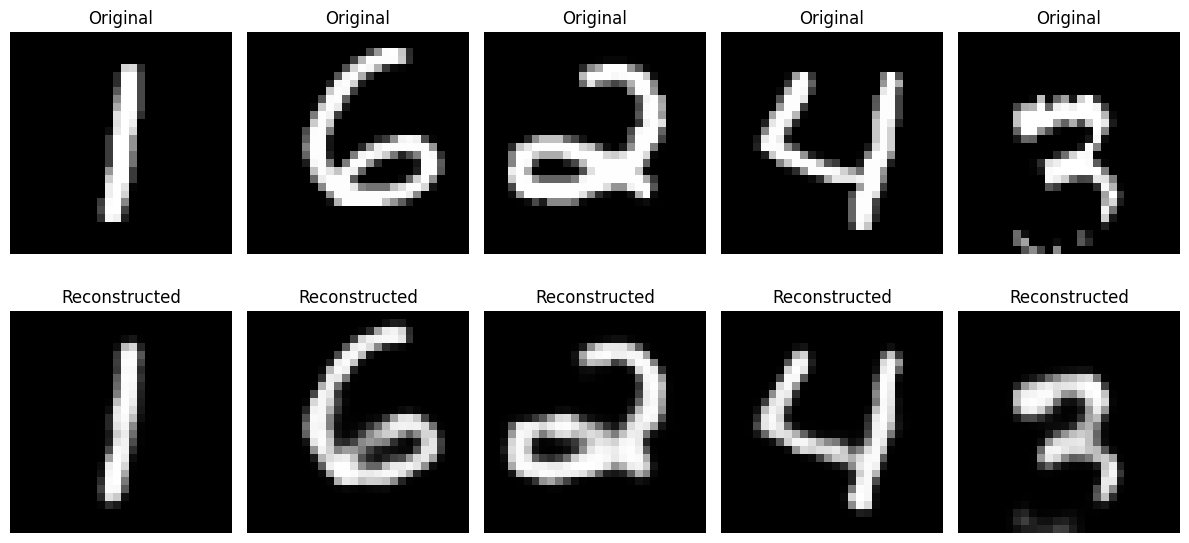

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

num_images_to_display = 5
random_indices = np.random.randint(0, len(x_test_mnist), num_images_to_display)
selected_images = x_test_mnist[random_indices]
selected_images = selected_images.reshape(-1, 28, 28, 1)
random_indices_kmnist = np.random.randint(0, len(x_test_kmnist), num_images_to_display)
selected_images_kmnist = x_test_kmnist[random_indices]


reconstructed_images_kmnist = conv_autoencoder.predict(selected_images_kmnist)
reconstructed_images = conv_autoencoder.predict(selected_images)

# Display the original and reconstructed images
plt.figure(figsize=(12, 6))
for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, num_images_to_display, i + 1 + num_images_to_display)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

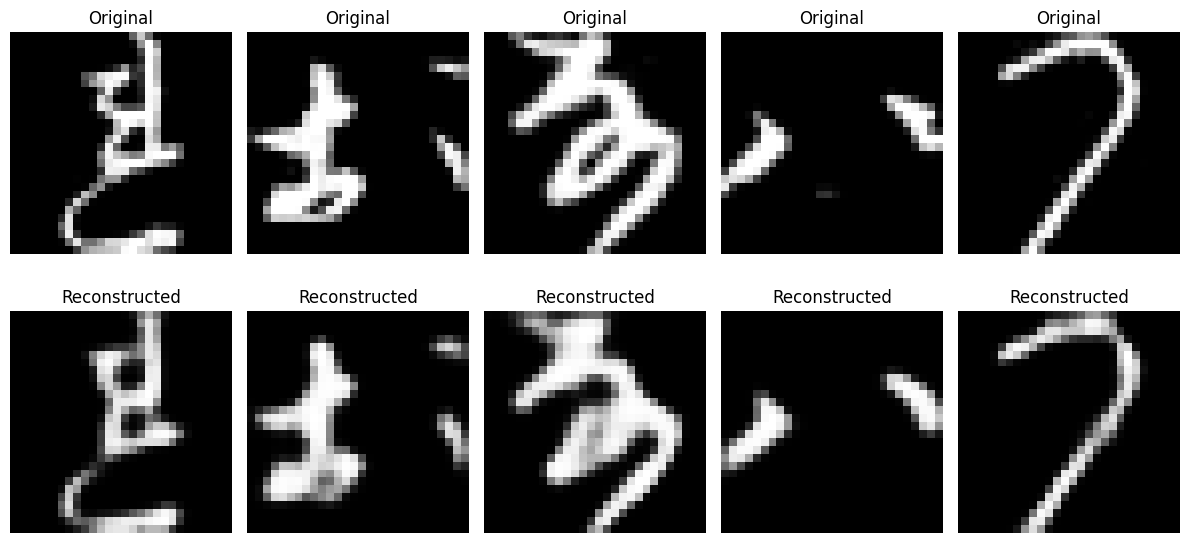

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(selected_images_kmnist[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, num_images_to_display, i + 1 + num_images_to_display)
    plt.imshow(reconstructed_images_kmnist[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
temp = con_encoder
conv_autoencoder_classifier = classification_model = Sequential([
    temp,  # Include the con_encoder
    Flatten(),
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(10, activation='softmax')  # Output layer with 10 classes (assuming 10 classes for classification)
])

In [ ]:
conv_autoencoder_classifier.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

np.random.seed(42)
tf.random.set_seed(42)

num_samples_to_use = 7500
x_train_mnist_subset_conv_encoder = x_train_mnist[:num_samples_to_use]
y_train__mnist_subset_conv_encoder = y_train_mnist[:num_samples_to_use]

In [ ]:
history = conv_autoencoder_classifier.fit(x_train_mnist_subset_conv_encoder, y_train__mnist_subset_conv_encoder, epochs=5, validation_data=(x_test_mnist, y_test_mnist))

Epoch 1/5
235/235 [==============================] - 4s 10ms/step - loss: 0.1838 - accuracy: 0.9453 - val_loss: 0.0891 - val_accuracy: 0.9712
Epoch 2/5
235/235 [==============================] - 2s 9ms/step - loss: 0.0400 - accuracy: 0.9885 - val_loss: 0.2072 - val_accuracy: 0.9389
Epoch 3/5
235/235 [==============================] - 2s 7ms/step - loss: 0.0211 - accuracy: 0.9940 - val_loss: 0.0592 - val_accuracy: 0.9819
Epoch 4/5
235/235 [==============================] - 2s 7ms/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 0.0803 - val_accuracy: 0.9783
Epoch 5/5
235/235 [==============================] - 2s 9ms/step - loss: 0.0205 - accuracy: 0.9928 - val_loss: 0.0848 - val_accuracy: 0.9755
